/home/deadpool/.local/lib/python3.6/site-packages/ipykernel_launcher.py:49: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
'NimbusRoman-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


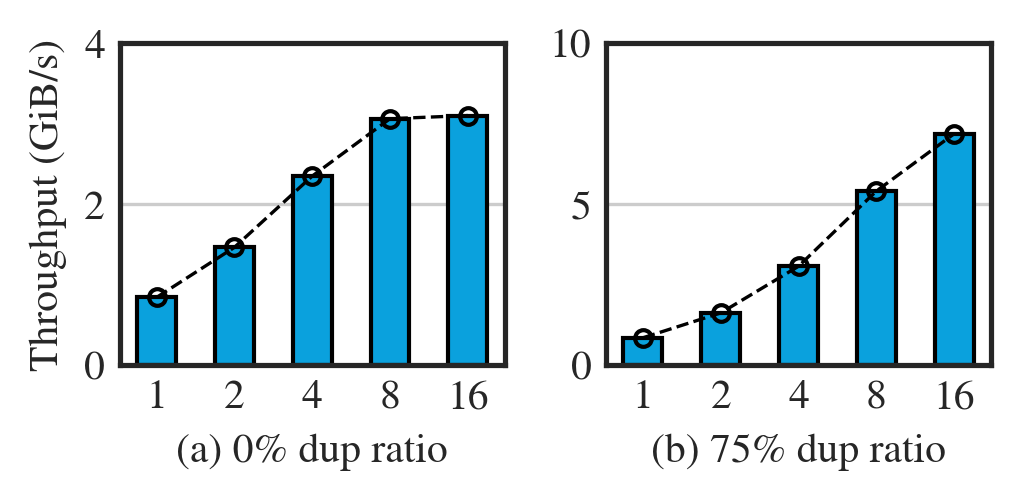

In [14]:
# ipython -c "%run plot.ipynb"

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import numpy as np

# Paper specific settings
STANDARD_WIDTH = 17.8
SINGLE_COL_WIDTH = STANDARD_WIDTH / 2
DOUBLE_COL_WIDTH = STANDARD_WIDTH
def cm_to_inch(value):
    return value/2.54
    
# matplotlib style settings
matplotlib.rcParams['text.usetex'] = False
style.use('seaborn-white')
plt.rcParams["axes.grid"] = True
plt.rcParams["axes.grid.axis"] = "y"
plt.rcParams["grid.linewidth"] = 0.8
plt.rcParams["font.family"] = "Nimbus Roman"
pd.options.display.max_columns = None
pd.options.display.max_rows = None


# Data Preprocessing
with open("./avg-test-interleaved-result-in-paper", "r") as f:
    df = pd.read_csv(f, delim_whitespace=True, index_col=None, engine='python')


# Plotting Settings
fig = plt.figure(dpi = 300, figsize = (cm_to_inch(SINGLE_COL_WIDTH), cm_to_inch(4.5)))
# Reference: https://designbro.com/blog/inspiration/color-combinations/
titles = ["(a) 0% dup ratio", "(b) 75% dup ratio"]
colors = ["#0AA1DD"]
bar_width = 0.5

x_labels = df["dup_rate"]
x = list(range(1, len(x_labels) + 1))

df_dup0 =  df[df['dup_rate'] == 0].drop(columns=['dup_rate'])
df_dup75 = df[df['dup_rate'] == 75].drop(columns=['dup_rate'])

# Figure a
subfig = plt.subplot(1, 2, 1)
dfs = [df_dup0, df_dup75]
for i in range(2):
    subfig = plt.subplot(1, 2, i + 1)
    df = dfs[i]
    x = [1, 2, 3, 4, 5]
    x_label = df['num_job'].drop_duplicates().reset_index().drop(columns=['index'])['num_job']
    plt.bar(x, df['bw'] / 1024, width=bar_width, edgecolor='black', color=colors[0])
    plt.plot(x, df['bw'] / 1024, color='black', linestyle='dashed', linewidth=0.8, marker='o', markersize=4, mfc='none')
    
    if i == 0:
        plt.yticks([0, 2, 4])
        plt.ylabel("Throughput (GiB/s)")
    else:
        plt.yticks([0, 5, 10])
    plt.xticks(x, labels=x_label)
    plt.xlabel(titles[i])

plt.tight_layout()
plt.savefig("./FIG-Interleaved.pdf", bbox_inches='tight', pad_inches=0)
